# Analysis of the synthetic calibration of the equilirium MD1 runs

## 20% parameter variance (corrected verions)

In [1]:
import sys,os
# get utils path (one fodelr up)
curr_dir = os.getcwd()
one_folder_up = os.path.dirname(curr_dir)
sys.path.append(one_folder_up)
import numpy as np
import pandas as pd
import utils as ut
from matplotlib import pyplot as plt
%matplotlib inline

check the spread in the results w.r.t. targets

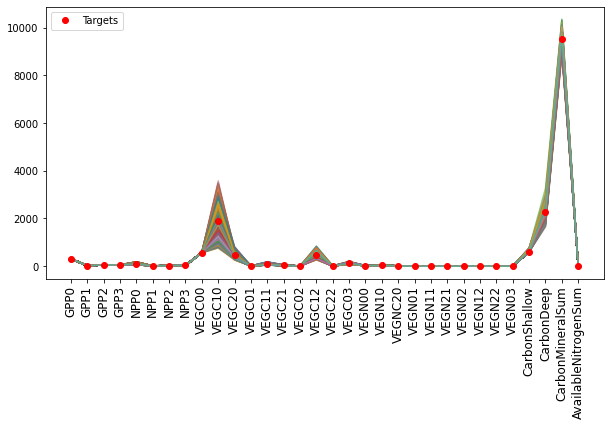

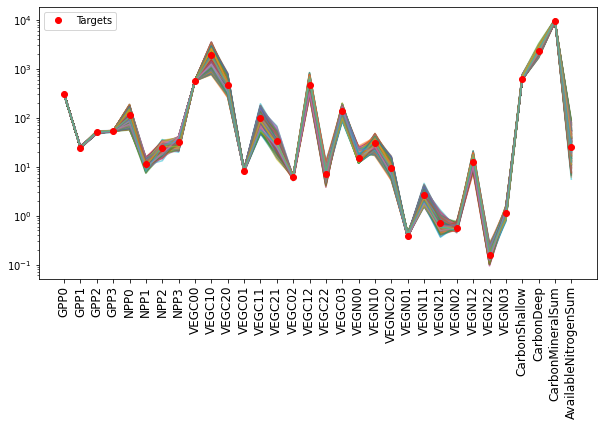

In [2]:
sa_path='all-md1-setup-files-20per-corr/check_all-run/'
model='results.csv'
params='sample_matrix.csv'
df_model = pd.read_csv(sa_path+model,header=None)
df_param = pd.read_csv(sa_path+params)
#print(df_param.head())


model_header =  ['GPP0','GPP1','GPP2','GPP3',\
                 'NPP0','NPP1','NPP2','NPP3',\
                   'VEGC00','VEGC10','VEGC20',\
                   'VEGC01','VEGC11','VEGC21',\
                   'VEGC02','VEGC12','VEGC22',\
                   'VEGC03',\
                   'VEGN00','VEGN10','VEGNC20',\
                   'VEGN01','VEGN11','VEGN21',\
                   'VEGN02','VEGN12','VEGN22',\
                   'VEGN03','CarbonShallow','CarbonDeep',\
                 'CarbonMineralSum','AvailableNitrogenSum'
                   ]
df_model.columns = model_header
df_model.head()

param_header = ['nmax0','nmax1','nmax2','nmax3',
               'krb00','krb01','krb02','krb03',\
               'krb10','krb11','krb12',\
               'krb20','krb21','krb22',
               'cfall00','cfall01','cfall02','cfall03',\
               'cfall10','cfall11','cfall12',\
               'cfall20','cfall21','cfall22',\
               'nfall00','nfall01','nfall02','nfall03',\
               'nfall10','nfall11','nfall12',\
               'nfall20','nfall21','nfall22',\
               'micbnup','kdcrawc','kdcsoma','kdcsompr','kdcsomcr'
               ]
df_param.columns = param_header

df_model.head()
df_param.head()

ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

# Workflow:
## Above-ground
### (1) cmax -> GPP
### (2) nmax, krb -> NPP, VEGC
### (3) cfall -> NPP, VEGC
### (4) nfall -> NPP, VEGC,VEGN
## Below-ground
### (5) soil param -> NPP, VEGC,VEGN, SoilC

In [15]:
ls all-md1-setup-files-20per-corr/yaml-files/

config-cfall-npp-vegc-md1.yaml       config-nfall-npp-vegc-vegn-md1.yaml
config-cmax-gpp-md1.yaml             config-nmax-krb-npp-cfall-md1.yaml


In [13]:
path='all-md1-setup-files-20per-corr/csv-files/'
model='out-cmax-gpp-md1-r-EJ.finalresults.csv'
params='param-cmax-gpp-md1-r-EJ.finalresults.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)
model_header = ['GPP0','GPP1','GPP2','GPP3']
df_model.columns = model_header

df_param = pd.read_csv(path+params,header=None)
param_header = ['cmax0','cmax1','cmax2','cmax3']
df_param.columns = param_header
df_model

,GPP0,GPP1,GPP2,GPP3
0,306.987830,24.170209,64.424002,47.733915
1,307.170002,24.609999,50.009993,52.870001
2,410.892065,41.361934,47.995694,10.762071
3,307.170141,24.610003,50.009986,52.869999
4,307.169911,24.610095,50.010144,52.870034
5,307.169918,24.610015,50.010034,52.870008
6,307.168145,24.610198,50.008995,52.869718
7,307.169917,24.610022,50.010036,52.870008
8,307.170006,24.610009,50.010014,52.869999
9,307.167253,24.609882,50.009801,52.869980


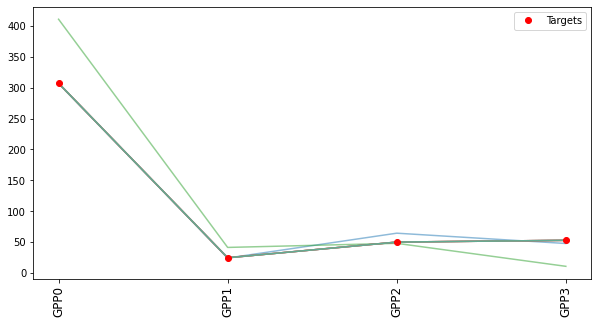

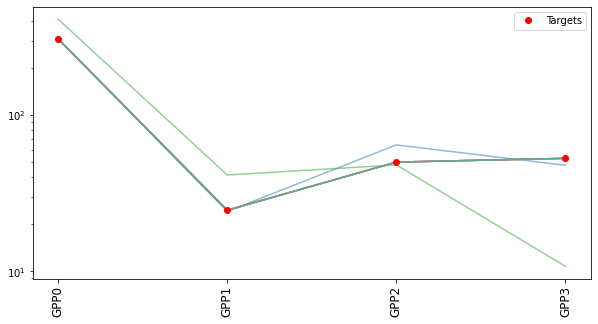

In [9]:
ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

array([5.85923552e+01, 1.34833606e-11, 3.20400728e+03, 5.04122594e-09,
       9.71357757e-09, 2.05891385e-09, 1.14262066e-06, 2.15978605e-09,
       7.45751842e-11, 1.90027118e-06])

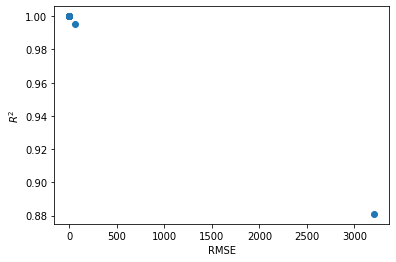

In [10]:
ut.plot_r2_rmse(df_model)

In [11]:
xparams, ymodel = ut.get_params_r2_rmse(df_param,df_model,r2lim=0.97)
xparams

,cmax0,cmax1,cmax2,cmax3,$R^2$,RMSE,MAPE,COMBINED_ACC
0,379.718137,110.838629,263.973156,82.916498,0.995503,5.859236e+01,8.753094e-02,0.948402
1,381.192983,113.937936,210.477194,93.309090,1.000000,1.348336e-11,4.684325e-08,1.000000
3,381.193177,113.937958,210.477186,93.309088,1.000000,5.041226e-09,2.157501e-07,1.000000
4,381.192880,113.938363,210.477789,93.309148,1.000000,9.713578e-09,1.917451e-06,0.999999
5,381.192880,113.938005,210.477352,93.309100,1.000000,2.058914e-09,4.272302e-07,1.000000
6,381.187283,113.938274,210.472294,93.308557,1.000000,1.142621e-06,9.878758e-06,0.999996
7,381.192901,113.938041,210.477371,93.309101,1.000000,2.159786e-09,5.094758e-07,1.000000
8,381.192995,113.937980,210.477276,93.309086,1.000000,7.457518e-11,1.681360e-07,1.000000
9,381.189630,113.937371,210.476348,93.309047,1.000000,1.900271e-06,4.525559e-06,0.999998


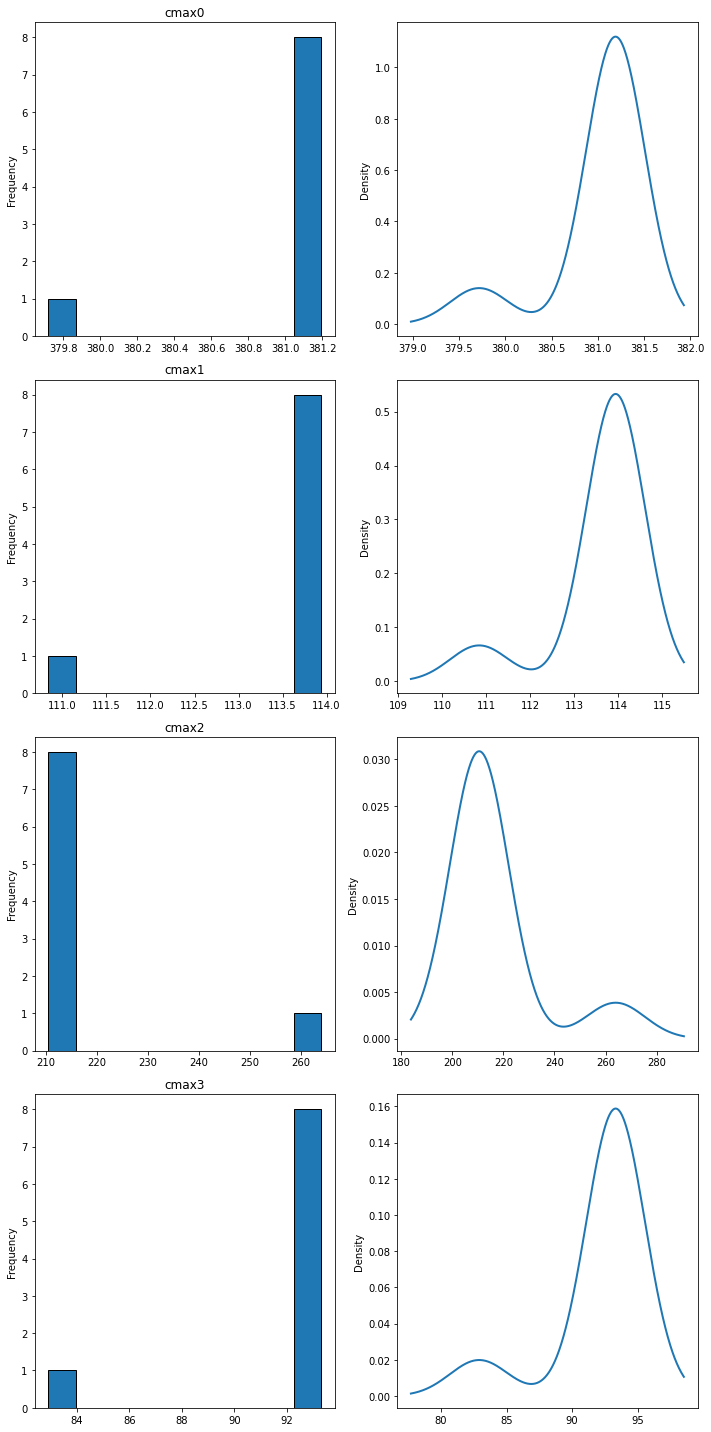

In [12]:
xparams, ymodel = ut.get_params(df_param,df_model,r2lim=0.9)
# if throws a 'is_first_col' error, do 'pip install --upgrade matplotlib'
ut.plot_hist_dist(xparams)

In [16]:
def z_score(y_short,y_long):
    '''
    NOTE: this function assumes that last row in y_long is target
    
    y_short: model dataframe restricted by R2
    y_long : full model dataframe 
    '''
    zscore=[]
    print('mean-obs','std')
    for iname in y_long.columns:
        zscore.append((y_short[iname].mean()-y_long[iname].iloc[-1])/y_short[iname].std())
        print (y_short[iname].mean()-y_long[iname].iloc[-1],y_short[iname].std())
    df_z = pd.DataFrame(zscore)
    df_z.index = y_long.columns
    
    return df_z

xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param,df_model)
xparams_MD1
rmetric='r2rmse'
nelem=10
order=True
z_score(ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:nelem],df_model)

mean-obs std
10.353518691062845 32.80641264873097
1.6312365275621445 5.314669125014228
1.2398698180913996 4.671998200141723
-4.724426740407942 13.234026078213727


,0
GPP0,0.315594
GPP1,0.306931
GPP2,0.265383
GPP3,-0.356991


In [17]:
nelem=5
order=True
z_score(ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:nelem],df_model)

mean-obs std
-3.2567978109909745e-06 9.154018302086402e-05
9.600520137098556e-06 9.193731675755287e-06
1.249313354634296e-05 2.296442278370029e-05
3.0517578082367436e-06 4.612965158458965e-06


,0
GPP0,-0.035578
GPP1,1.044246
GPP2,0.544021
GPP3,0.661561


In [9]:
cmax_true_params = [381.19, 113.93, 210.48, 93.31]
xparams_MD1.sort_values(by=[rmetric],ascending=order)[:10]

,cmax0,cmax1,cmax2,cmax3,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
2,389.540351,114.887855,205.447291,97.197723,1.000000,8.345006e-07,0.000009,1.000000,1.098075e-09,0.000029
4,390.606140,115.198657,205.954026,97.526114,1.000000,3.953394e-05,0.000125,0.999816,5.202061e-08,0.000397
9,389.565302,114.929591,205.401516,97.206311,1.000000,7.323014e-05,0.000179,0.999730,9.635966e-08,0.000570
8,389.548492,114.960704,205.453587,97.184264,1.000000,7.560805e-05,0.000197,0.999700,9.948863e-08,0.000630
0,390.408856,115.246207,205.873774,97.488087,1.000000,1.205561e-04,0.000260,0.999599,1.586334e-07,0.000830
5,390.610529,115.328778,206.074923,97.527499,1.000000,2.777967e-04,0.000388,0.999396,3.655380e-07,0.001237
3,389.522924,114.904295,205.467353,97.200265,1.000000,3.479799e-04,0.000077,0.999891,4.578887e-07,0.000246
1,389.672232,91.911084,216.885615,97.170591,0.999383,8.651284e+00,0.078856,0.867937,1.138342e-02,0.251804
6,374.564041,117.523115,204.415973,114.457343,0.996006,5.035132e+01,0.052917,0.878539,6.627582e-02,0.181347
7,359.514558,196.113527,299.626454,171.332920,0.921003,7.611074e+02,0.313484,-0.078997,1.003115e+00,1.416418


In [10]:
df_model.iloc[-1]

GPP0    313.69
GPP1     24.76
GPP2     48.55
GPP3     55.07
Name: 10, dtype: float64

In [11]:
ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:10]

,GPP0,GPP1,GPP2,GPP3,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
2,313.688303,24.759414,48.549932,55.070333,1.000000,8.345006e-07,0.000009,1.000000,1.098075e-09,0.000029
4,313.687196,24.755589,48.540452,55.063704,1.000000,3.953394e-05,0.000125,0.999816,5.202061e-08,0.000397
9,313.690325,24.768076,48.535881,55.075314,1.000000,7.323014e-05,0.000179,0.999730,9.635966e-08,0.000570
8,313.688549,24.775684,48.550938,55.062689,1.000000,7.560805e-05,0.000197,0.999700,9.948863e-08,0.000630
0,313.690085,24.778998,48.545574,55.080085,1.000000,1.205561e-04,0.000260,0.999599,1.586334e-07,0.000830
5,313.692423,24.784893,48.571340,55.064499,1.000000,2.777967e-04,0.000388,0.999396,3.655380e-07,0.001237
3,313.652929,24.762385,48.552882,55.071918,1.000000,3.479799e-04,0.000077,0.999891,4.578887e-07,0.000246
1,313.790861,19.704034,51.555334,55.058247,0.999383,8.651284e+00,0.078856,0.867937,1.138342e-02,0.251804
6,303.412512,25.322847,48.312276,64.837560,0.996006,5.035132e+01,0.052917,0.878539,6.627582e-02,0.181347
7,293.076330,42.969787,72.551736,96.444225,0.921003,7.611074e+02,0.313484,-0.078997,1.003115e+00,1.416418


In [12]:
xparams_MD1.sort_values(by=[rmetric],ascending=order)[:10]

,cmax0,cmax1,cmax2,cmax3,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
2,389.540351,114.887855,205.447291,97.197723,1.000000,8.345006e-07,0.000009,1.000000,1.098075e-09,0.000029
4,390.606140,115.198657,205.954026,97.526114,1.000000,3.953394e-05,0.000125,0.999816,5.202061e-08,0.000397
9,389.565302,114.929591,205.401516,97.206311,1.000000,7.323014e-05,0.000179,0.999730,9.635966e-08,0.000570
8,389.548492,114.960704,205.453587,97.184264,1.000000,7.560805e-05,0.000197,0.999700,9.948863e-08,0.000630
0,390.408856,115.246207,205.873774,97.488087,1.000000,1.205561e-04,0.000260,0.999599,1.586334e-07,0.000830
5,390.610529,115.328778,206.074923,97.527499,1.000000,2.777967e-04,0.000388,0.999396,3.655380e-07,0.001237
3,389.522924,114.904295,205.467353,97.200265,1.000000,3.479799e-04,0.000077,0.999891,4.578887e-07,0.000246
1,389.672232,91.911084,216.885615,97.170591,0.999383,8.651284e+00,0.078856,0.867937,1.138342e-02,0.251804
6,374.564041,117.523115,204.415973,114.457343,0.996006,5.035132e+01,0.052917,0.878539,6.627582e-02,0.181347
7,359.514558,196.113527,299.626454,171.332920,0.921003,7.611074e+02,0.313484,-0.078997,1.003115e+00,1.416418


## (2) nmax, krb -> NPP, VEGC

In [19]:
model='out-nmax-krb-npp-vegc-md1-r-EJ.finalresults.csv'
params='param-nmax-krb-npp-vegc-md1-r-EJ.finalresults.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)
model_header =  ['NPP0','NPP1','NPP2','NPP3',\
                   'VEGC00','VEGC10','VEGC20',\
                   'VEGC01','VEGC11','VEGC21',\
                   'VEGC02','VEGC12','VEGC22',\
                   'VEGC03'
                   ]
df_model.columns = model_header

df_param = pd.read_csv(path+params,header=None)
param_header = ['nmax0','nmax1','nmax2','nmax3',
               'krb00','krb01','krb02','krb03',\
               'krb10','krb11','krb12',\
               'krb20','krb21','krb22']
df_param.columns = param_header
df_model.head()

,NPP0,NPP1,NPP2,NPP3,VEGC00,VEGC10,VEGC20,VEGC01,VEGC11,VEGC21,VEGC02,VEGC12,VEGC22,VEGC03
0,113.200069,11.350807,23.916004,32.332375,573.453369,1894.016272,474.521140,8.470479,98.898501,33.210559,6.195064,477.829767,6.212789,136.159987
1,112.989796,11.249523,24.373125,32.337758,573.937964,1893.346216,468.188300,8.270424,98.854791,33.219066,6.270416,479.270752,7.156464,136.175331
2,113.305199,11.266942,23.964491,32.401296,572.137915,1893.785413,474.331067,8.221040,98.858701,33.164425,6.038229,477.659186,7.364993,136.486902
3,110.255257,13.399846,23.532047,30.177505,567.941339,1896.728064,451.330417,8.364335,132.933621,44.533907,5.877487,488.675180,5.903953,127.259229
4,113.392177,11.340914,23.757465,32.417245,571.826324,1894.031592,474.508356,8.407049,98.827341,33.188197,5.879291,477.894452,6.331361,136.536945


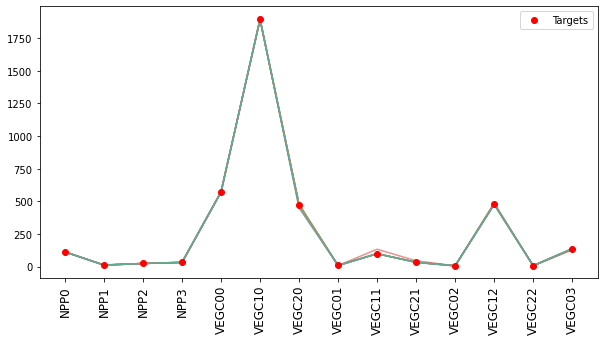

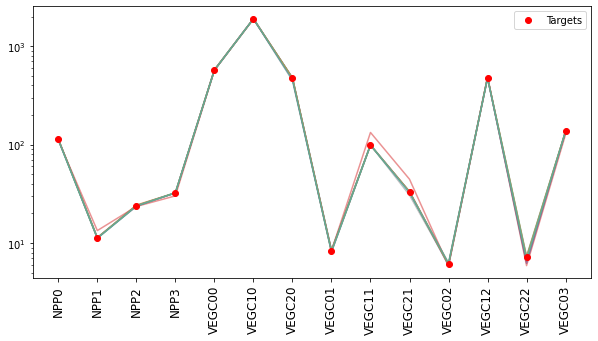

In [20]:
ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

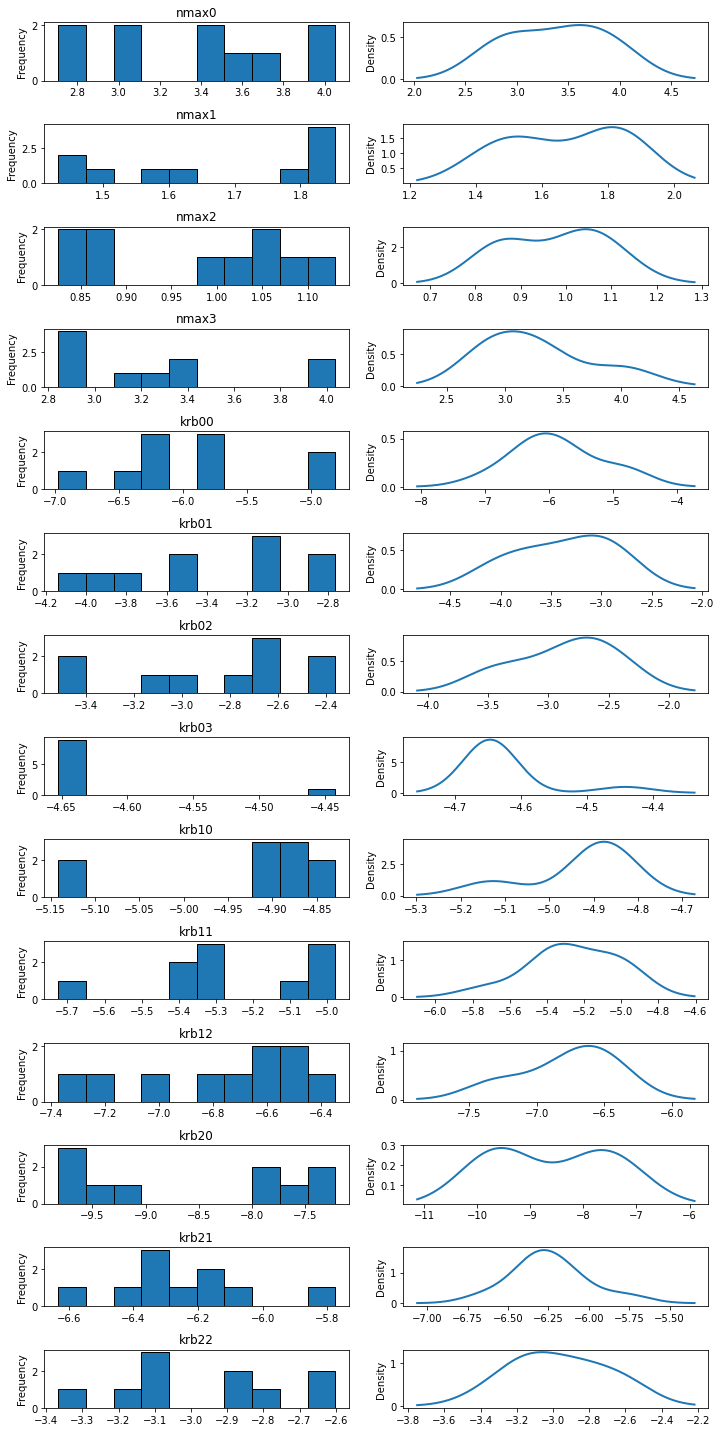

In [21]:
xparams, ymodel = ut.get_params(df_param,df_model,r2lim=0.9)
# if throws a 'is_first_col' error, do 'pip install --upgrade matplotlib'
ut.plot_hist_dist(xparams)

In [22]:
xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param,df_model)
xparams_MD1
rmetric='r2rmse'
nelem=10
order=True

nmax_krb_true_params = [3.38, 1.55, 1.00, 3.55, \
                    -6.0, -3.45, -2.95, -4.65, -4.88, -5.15, -6.65, -8.2, -6.2, -3.2]
xparams_MD1.sort_values(by=[rmetric],ascending=order)[:10]

,nmax0,nmax1,nmax2,nmax3,krb00,krb01,krb02,krb03,krb10,krb11,krb12,krb20,krb21,krb22,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
2,2.706250,1.845434,0.989943,4.007583,-6.341983,-3.066330,-2.675072,-4.649381,-4.857358,-5.321711,-6.705722,-7.662135,-6.337571,-3.366974,1.000000,0.021576,0.004955,0.983664,0.000145,0.057600
8,4.052477,1.826903,0.878016,2.842614,-5.716555,-3.524217,-2.792056,-4.652611,-4.907957,-5.117818,-6.966432,-9.628113,-6.181219,-3.130366,1.000000,0.051173,0.003712,0.990980,0.000345,0.043151
4,2.816661,1.452113,0.824981,2.855537,-5.737933,-3.753665,-2.362486,-4.650596,-4.907898,-5.037220,-7.252648,-9.446338,-6.128077,-2.789940,1.000000,0.088815,0.014518,0.926389,0.000599,0.168755
5,3.008356,1.512406,1.065105,3.175150,-5.712105,-2.843005,-2.631581,-4.649055,-4.910332,-5.395128,-6.643325,-9.792439,-6.410702,-2.875147,1.000000,0.116045,0.012295,0.939558,0.000782,0.142919
0,3.619083,1.432544,1.071463,4.036615,-6.121976,-3.969859,-3.139001,-4.641786,-4.870697,-4.982540,-6.472593,-7.987146,-6.066339,-2.604856,0.999999,0.164988,0.013924,0.929679,0.001112,0.161848
6,3.414386,1.831279,0.877877,2.878537,-6.257009,-3.108941,-2.996233,-4.647235,-4.862404,-5.311023,-6.837877,-7.765332,-6.313937,-3.204757,0.999999,0.190158,0.002217,0.999431,0.001282,0.025801
7,3.482584,1.776941,1.050753,3.327326,-6.974379,-4.139375,-2.690260,-4.640696,-4.829043,-4.978555,-6.622893,-7.392776,-5.774794,-3.128831,0.999997,0.695333,0.010652,0.947405,0.004688,0.123905
1,3.921083,1.613430,1.009895,3.298249,-6.287208,-3.081710,-3.432009,-4.642658,-4.868409,-5.318010,-6.492563,-7.211914,-6.316046,-3.064257,0.999986,3.277991,0.005578,0.968955,0.022099,0.068504
9,3.775427,1.852955,1.130758,2.921571,-4.812039,-2.762772,-3.514012,-4.650397,-5.141707,-5.426144,-6.345401,-9.824342,-6.283131,-2.894536,0.999805,46.406977,0.017031,0.755048,0.312865,0.370235
3,3.052782,1.569906,0.853663,3.377429,-4.870080,-3.498287,-2.404117,-4.442150,-5.116969,-5.725024,-7.373112,-9.288911,-6.633012,-2.600844,0.999375,148.329260,0.086031,-0.000625,1.000000,1.414214


In [22]:
print(df_model.iloc[-1])
ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:10]

NPP0       121.96
NPP1        10.80
NPP2         4.84
NPP3        29.04
VEGC00     579.41
VEGC10    2188.64
VEGC20     470.81
VEGC01       8.07
VEGC11      86.53
VEGC21      26.13
VEGC02       3.83
VEGC12      73.75
VEGC22       1.13
VEGC03     118.48
Name: 8, dtype: float64


,NPP0,NPP1,NPP2,NPP3,VEGC00,VEGC10,VEGC20,VEGC01,VEGC11,VEGC21,VEGC02,VEGC12,VEGC22,VEGC03,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
1,125.580390,12.793429,15.326373,33.632723,573.158899,2190.685522,491.687897,8.514133,125.270040,28.900563,5.900829,285.037122,4.307429,141.464497,0.989090,3380.062024,0.250666,0.801823,0.609458,1.012103
7,126.329923,14.898866,15.534038,34.054631,575.245398,2196.246802,483.095395,8.608280,158.164743,38.817181,5.773555,283.024622,5.133843,143.178674,0.988449,3580.002486,0.289446,0.551396,0.645509,1.134568
4,127.154478,13.449489,15.061625,29.018720,574.669812,2172.460229,509.615799,8.542675,132.016090,39.441954,5.753319,290.693567,5.192672,122.468439,0.988010,3662.547723,0.260144,0.685790,0.660396,1.067399
6,122.974161,12.972721,14.859367,28.441388,574.556946,2099.447192,505.609177,8.587996,126.434860,33.778658,5.865574,295.680685,5.067954,120.522717,0.984988,4301.757721,0.248912,0.594249,0.775670,1.116007
2,120.712354,12.393728,15.149317,27.358802,572.466852,2110.741626,493.759131,8.603640,119.603032,26.488630,6.088407,313.743954,4.665521,116.363651,0.983859,4676.403420,0.231453,0.598354,0.843220,1.125913
5,123.744772,7.931872,15.932692,27.734286,573.579565,2163.048999,496.756696,8.227026,45.621423,20.291812,5.949596,325.862552,5.970871,117.850917,0.984414,4771.069330,0.310219,0.163438,0.860274,1.319117
3,126.523045,10.230776,16.008694,27.719906,574.733386,2223.613403,507.382498,8.520005,82.022469,24.489495,6.038845,329.093185,4.553992,117.441246,0.984903,4855.087193,0.215006,0.644540,0.875409,1.116556
0,126.371477,9.563146,17.564974,28.983174,576.759540,2136.016699,521.581738,8.359118,72.370496,17.869718,5.934474,341.713547,6.350367,122.319941,0.981439,5546.901519,0.264426,0.221914,1.000172,1.314118


## (3) cfall -> NPP, VEGC
looks like `krb` does better than `cfall`

In [23]:
model='out-cfall-vegc-md1-r-EJ.finalresults.csv'
params='param-cfall-vegc-md1-r-EJ.finalresults.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)
model_header =  ['NPP0','NPP1','NPP2','NPP3',\
                   'VEGC00','VEGC10','VEGC20',\
                   'VEGC01','VEGC11','VEGC21',\
                   'VEGC02','VEGC12','VEGC22',\
                   'VEGC03'
                   ]
df_model.columns = model_header

df_param = pd.read_csv(path+params,header=None)
param_header = [
               'cfall00','cfall01','cfall02','cfall03',\
               'cfall10','cfall11','cfall12',\
               'cfall20','cfall21','cfall22']
df_param.columns = param_header
df_model.head()

,NPP0,NPP1,NPP2,NPP3,VEGC00,VEGC10,VEGC20,VEGC01,VEGC11,VEGC21,VEGC02,VEGC12,VEGC22,VEGC03
0,113.099537,11.314285,24.092567,32.416541,572.247357,1894.001355,474.516687,8.854014,98.890999,33.179796,6.128400,477.756042,6.992304,136.635738
1,113.129124,11.311682,23.967676,32.428696,572.406653,1893.912549,474.457382,8.693797,98.895387,33.184371,6.193306,477.886221,6.931956,136.517062
2,112.806100,11.306430,23.001747,32.350447,572.558307,1894.152258,475.014114,8.844772,98.840806,32.908180,6.312893,477.784088,6.721720,137.239687
3,113.064712,11.301223,23.850500,32.409065,572.157635,1893.892065,474.580215,8.488667,98.866657,33.248891,6.134916,477.880789,7.172924,136.617705
4,113.095756,11.300740,23.933837,32.412803,572.325629,1894.109656,474.603058,8.409554,98.871724,33.199108,6.159653,477.891086,7.107963,136.580540


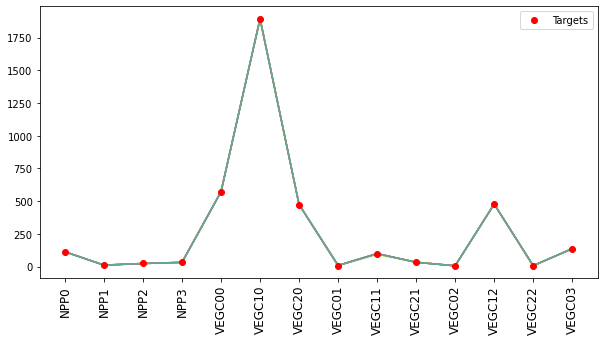

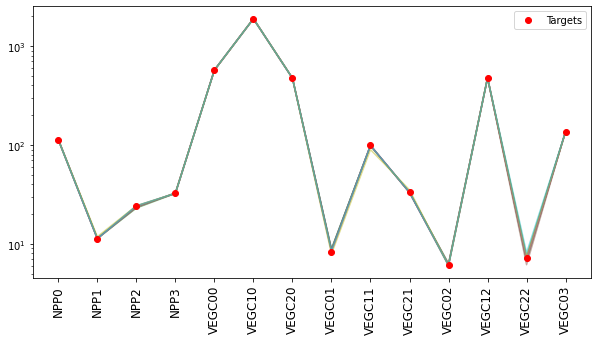

In [24]:
ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

In [25]:
xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param,df_model)
xparams_MD1
rmetric='r2rmse'
nelem=10
order=True

nmax_krb_true_params = [3.38, 1.55, 1.00, 3.55, \
0.0011, 0.0507, 0.0250, 0.0199, 0.0034, 0.0058, 0.0036, 0.0052, 0.0012, 0.0260]
xparams_MD1.sort_values(by=[rmetric],ascending=order)[:10]

,cfall00,cfall01,cfall02,cfall03,cfall10,cfall11,cfall12,cfall20,cfall21,cfall22,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
4,0.001145,0.049471,0.024465,0.019921,0.003407,0.004882,0.003596,0.005147,0.001197,0.026259,1.000000,0.002616,0.001725,1.000000,0.000413,0.070222
3,0.001097,0.047747,0.025056,0.019918,0.003426,0.004999,0.003592,0.005168,0.001226,0.025740,1.000000,0.009019,0.002021,0.993030,0.001425,0.082253
1,0.001206,0.043919,0.023644,0.019938,0.003391,0.005232,0.003605,0.005130,0.001295,0.027293,1.000000,0.015422,0.006259,0.899757,0.002436,0.254759
0,0.001175,0.040681,0.025365,0.019916,0.003403,0.005452,0.003611,0.005143,0.001353,0.026958,1.000000,0.022681,0.006454,0.894914,0.003583,0.262712
6,0.001320,0.051957,0.025174,0.019931,0.003354,0.004660,0.003612,0.005090,0.001155,0.026862,1.000000,0.031829,0.003215,0.965093,0.005027,0.130937
7,0.001008,0.041137,0.020285,0.019922,0.003442,0.005420,0.003551,0.005186,0.001347,0.024863,1.000000,0.070061,0.009695,0.820219,0.011066,0.394780
9,0.001119,0.047578,0.027743,0.019977,0.003398,0.004984,0.003586,0.005141,0.001218,0.022331,1.000000,0.094033,0.011893,0.770217,0.014853,0.484311
2,0.000885,0.040608,0.020000,0.019806,0.003485,0.005481,0.003562,0.005230,0.001374,0.027195,0.999999,0.173822,0.015343,0.688395,0.027455,0.625117
5,0.001086,0.043483,0.028934,0.020239,0.003538,0.005443,0.003679,0.005301,0.001332,0.030899,0.999998,0.590518,0.022808,0.492075,0.093273,0.933032
8,0.001213,0.059753,0.027613,0.020050,0.003365,0.005128,0.003587,0.005098,0.001013,0.024521,0.999973,6.331091,0.024568,-0.000027,1.000000,1.414214


In [26]:
print(df_model.iloc[-1])
ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:10]

NPP0       121.96
NPP1        10.80
NPP2         4.84
NPP3        29.04
VEGC00     579.41
VEGC10    2188.64
VEGC20     470.81
VEGC01       8.07
VEGC11      86.53
VEGC21      26.13
VEGC02       3.83
VEGC12      73.75
VEGC22       1.13
VEGC03     118.48
Name: 10, dtype: float64


,NPP0,NPP1,NPP2,NPP3,VEGC00,VEGC10,VEGC20,VEGC01,VEGC11,VEGC21,VEGC02,VEGC12,VEGC22,VEGC03,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
1,99.594647,12.218951,22.899020,34.057497,572.782892,2079.693848,453.798157,8.100175,84.510884,28.648086,5.937924,413.582184,6.609915,120.896177,0.967477,9185.196700,0.251380,0.967477,0.880374,1.235290
9,102.432001,11.850358,22.334117,32.797152,572.813348,2064.325122,432.196719,8.661872,90.539312,32.617214,6.164519,408.375522,7.097297,132.988527,0.966518,9283.971508,0.271264,0.670385,0.889864,1.290826
2,101.650939,11.163938,23.954819,34.127104,575.429834,2062.055542,455.504056,8.506852,100.957644,33.338014,6.236520,410.491437,8.509895,120.869567,0.966301,9342.760478,0.270356,0.658480,0.895499,1.292457
7,101.124369,12.364594,25.057279,33.964557,575.100708,2067.806909,465.357578,7.914812,82.750988,29.554984,6.004516,413.701678,6.433296,122.117027,0.966500,9368.411178,0.255802,0.836407,0.897947,1.258508
0,102.259958,11.985806,23.592392,33.245597,571.829205,2054.950940,435.581464,7.959580,88.572072,29.940660,5.939912,409.239594,7.551089,128.841411,0.965561,9475.366553,0.260150,0.736721,0.908219,1.276343
4,100.521898,12.036281,25.114868,34.141682,575.661920,2074.714307,467.680228,8.020004,86.922916,32.501416,5.913951,420.257639,6.521413,120.404013,0.965982,9574.752333,0.254799,0.766643,0.917716,1.270297
3,102.733409,11.063628,25.070401,32.944906,575.990210,2069.141382,465.147040,8.781829,103.014106,32.518117,6.211402,423.404477,8.892334,131.685808,0.964719,9852.110324,0.273732,0.410400,0.944310,1.334946
6,102.838611,11.658417,25.588681,33.635469,576.258893,2053.607202,485.673734,8.893580,90.570090,41.480253,5.959941,419.803256,8.572201,125.327673,0.963913,9956.786266,0.280047,0.286349,0.954360,1.357466
8,108.085187,12.770794,24.756590,34.328219,574.150684,2052.319873,383.771555,8.325493,80.815766,35.564850,5.891396,416.272855,8.659529,132.948828,0.962236,10322.963495,0.290098,0.009021,0.989471,1.406788
5,108.193313,12.247159,24.918865,35.121955,574.996063,2039.191138,425.762027,8.150058,89.397984,33.641962,6.067333,421.596115,6.780119,125.675711,0.961472,10440.415783,0.268623,0.238794,1.000742,1.363419


## (4) nfall -> NPP, VEGC, VEGN 

In [27]:
model='out-nfall-npp-vegc-vegn-md1-r-EJ.finalresults.csv'
params='param-nfall-npp-vegc-vegn-md1-r-EJ.finalresults.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)
model_header =  ['NPP0','NPP1','NPP2','NPP3',\
                   'VEGC00','VEGC10','VEGC20',\
                   'VEGC01','VEGC11','VEGC21',\
                   'VEGC02','VEGC12','VEGC22',\
                   'VEGC03',\
                   'VEGN00','VEGN10','VEGNC20',\
                   'VEGN01','VEGN11','VEGN21',\
                   'VEGN02','VEGN12','VEGN22',\
                   'VEGN03'
                   ]
df_model.columns = model_header

df_param = pd.read_csv(path+params,header=None)
param_header = [
               'nfall00','nfall01','nfall02','nfall03',\
               'nfall10','nfall11','nfall12',\
               'nfall20','nfall21','nfall22']
df_param.columns = param_header
df_model.head()

,NPP0,NPP1,NPP2,NPP3,VEGC00,VEGC10,VEGC20,VEGC01,VEGC11,VEGC21,...,VEGN00,VEGN10,VEGNC20,VEGN01,VEGN11,VEGN21,VEGN02,VEGN12,VEGN22,VEGN03
0,113.097250,11.298715,23.956505,32.414924,572.311456,1893.918445,474.516269,8.343866,98.881646,33.187730,...,14.789256,30.260995,9.509448,0.385008,2.601188,0.715733,0.572820,12.531396,0.156048,1.148612
1,113.118475,11.300729,24.467259,32.416383,572.224591,1894.283362,474.615625,8.343616,98.947837,33.189893,...,14.786684,30.265419,9.511420,0.384993,2.602771,0.715677,0.572505,12.519738,0.158923,1.148667
2,113.124497,11.300281,23.968338,32.415437,572.308740,1894.208423,474.594836,8.343969,98.901811,33.185247,...,14.789244,30.264700,9.511011,0.385013,2.601647,0.715625,0.573036,12.534499,0.156170,1.148627
3,113.081824,11.296771,23.802499,32.414618,572.324762,1894.041858,474.549747,8.345578,98.902514,33.185812,...,14.789402,30.262448,9.510108,0.385085,2.601710,0.715638,0.572675,12.532701,0.155036,1.148638
4,113.136801,11.300431,24.202577,32.415613,572.310181,1894.423328,474.649408,8.343955,98.917541,33.191874,...,14.789295,30.267613,9.512096,0.385011,2.602016,0.715806,0.572749,12.519277,0.157410,1.148634


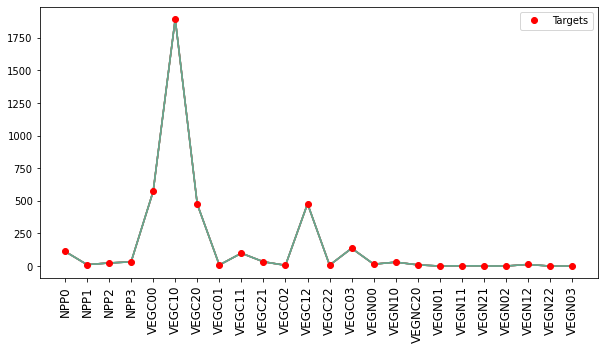

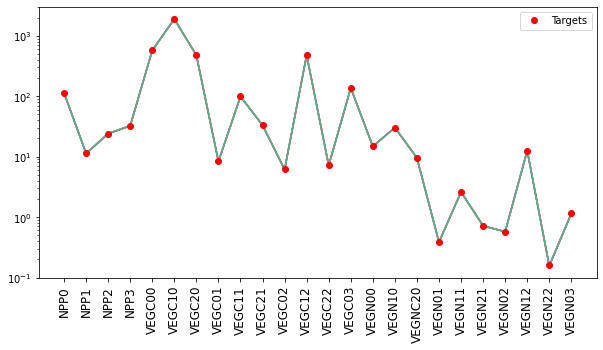

In [28]:
ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

## (5) soil param -> NPP, VEGC,VEGN, SoilC

In [29]:
model='out-csoil-md1-r-EJ.finalresults.csv'
params='param-csoil-md1-r-EJ.finalresults.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)
model_header =  ['CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum']
                
df_model.columns = model_header

df_param = pd.read_csv(path+params,header=None)
param_header = [ 'micbnup', 'kdcrawc', 'kdcsoma', 'kdcsompr', 'kdcsomcr']
               
df_param.columns = param_header
df_model.head()

,CarbonShallow,CarbonDeep,CarbonMineralSum,AvailableNitrogenSum
0,579.845907,1338.587975,3986.518932,19.266232
1,609.389684,1410.939118,4932.388559,7.055476
2,584.040606,1325.483622,4020.799382,11.743201
3,608.075121,1418.457418,4960.892654,8.106103
4,609.604491,1405.590850,4947.272277,2.867218


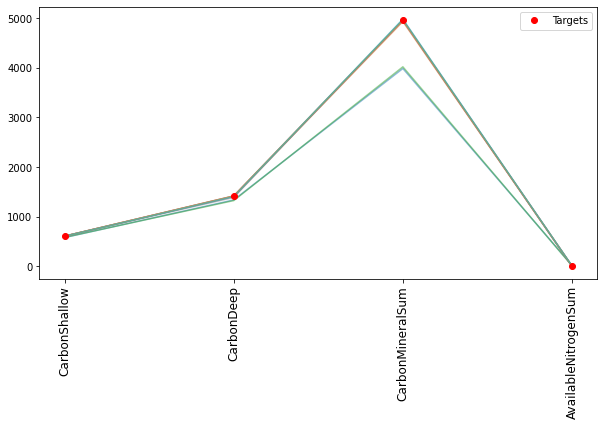

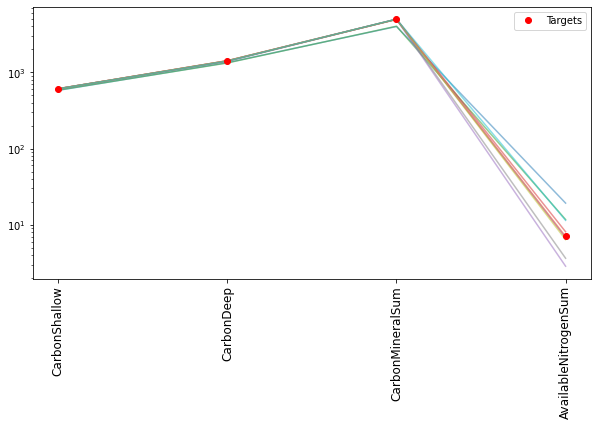

In [30]:
ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

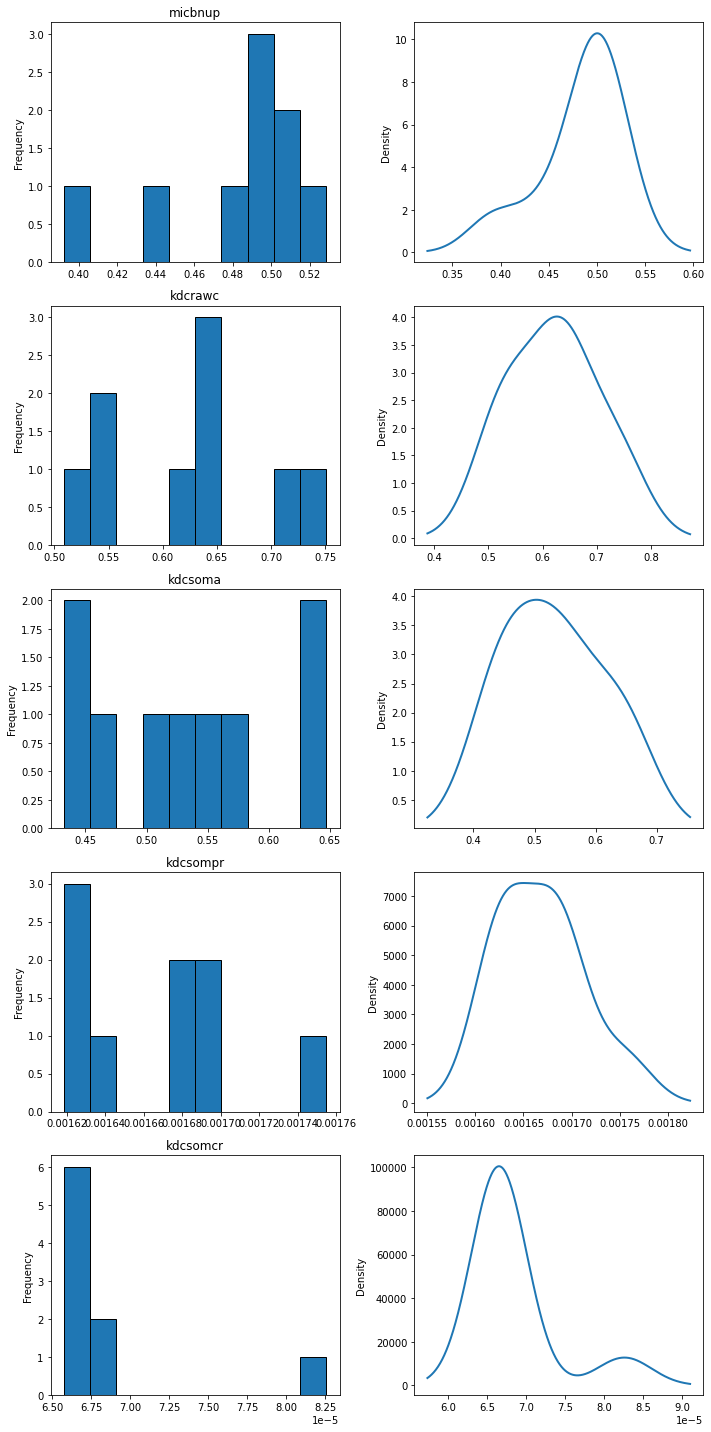

In [31]:
xparams, ymodel = ut.get_params(df_param,df_model,r2lim=0.9)
# if throws a 'is_first_col' error, do 'pip install --upgrade matplotlib'
ut.plot_hist_dist(xparams)

In [32]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
[nrows, ncols]=df_param.shape
score=[]
true_params=[0.4495,   # micbnup: parameter for soil microbial immobialization of N  .64 
             0.634,    # kdcrawc: raw-material (litter) C decompositin rates at reference condition   .654
             0.54,     # kdcsoma:   0.58
             0.002,    # kdcsompr:   
             0.00007]  # kdcsomcr:
rmse=[mean_squared_error(df_param.iloc[i], true_params) for i in range(nrows)]
rmse

df_rmse = pd.Series( rmse,  name = 'RMSE'  )
result = pd.concat([df_param, df_rmse], axis=1)
result

,micbnup,kdcrawc,kdcsoma,kdcsompr,kdcsomcr,RMSE
0,0.359654,0.760796,0.607767,0.001622,0.000084,0.005748
1,0.392246,0.540444,0.508834,0.001629,0.000068,0.002600
2,0.489474,0.751067,0.646229,0.001618,0.000083,0.005317
3,0.495547,0.635505,0.647033,0.001693,0.000066,0.002716
4,0.528507,0.537869,0.444790,0.001633,0.000066,0.004910
5,0.500889,0.639689,0.432204,0.001682,0.000066,0.002859
6,0.510467,0.640021,0.457620,0.001691,0.000066,0.002108
7,0.442265,0.508557,0.529330,0.001631,0.000067,0.003180
8,0.509532,0.617486,0.541531,0.001677,0.000066,0.000776
9,0.481666,0.718584,0.580089,0.001755,0.000066,0.001959


In [33]:
xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param,df_model)
xparams_MD1
rmetric='RMSE'
nelem=10
order=True
ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:nelem]

,CarbonShallow,CarbonDeep,CarbonMineralSum,AvailableNitrogenSum,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
5,608.499008,1418.548373,4958.589688,6.822821,0.999999,2.227857,0.015386,0.991239,0.000009,0.040262
8,608.644507,1417.199289,4957.869374,6.394271,0.999999,2.301288,0.033206,0.967371,0.000010,0.086895
6,608.353938,1415.492766,4958.814486,6.876120,0.999999,4.772612,0.013921,0.993195,0.000020,0.036430
3,608.075121,1418.457418,4960.892654,8.106103,0.999998,5.598279,0.029115,0.972842,0.000024,0.076190
4,609.604491,1405.590850,4947.272277,2.867218,0.999980,73.011569,0.382140,0.499831,0.000308,1.000000
1,609.389684,1410.939118,4932.388559,7.055476,0.999953,172.695824,0.008846,0.999594,0.000728,0.023159
9,607.256859,1406.359613,4982.346452,11.447897,0.999946,199.478153,0.097591,0.880664,0.000841,0.255381
7,609.548701,1387.974215,4975.284602,3.645329,0.999915,315.471562,0.251553,0.674168,0.001331,0.658274
2,584.040606,1325.483622,4020.799382,11.743201,0.906037,221703.853922,0.183933,0.204932,0.937897,1.054193
0,579.845907,1338.587975,3986.518932,19.266232,0.897226,237579.235365,0.245793,0.079853,1.005267,1.193428


In [34]:
rmetric='RMSE'
result.sort_values(by=[rmetric],ascending=order)[:nelem]

,micbnup,kdcrawc,kdcsoma,kdcsompr,kdcsomcr,RMSE
8,0.509532,0.617486,0.541531,0.001677,0.000066,0.000776
9,0.481666,0.718584,0.580089,0.001755,0.000066,0.001959
6,0.510467,0.640021,0.457620,0.001691,0.000066,0.002108
1,0.392246,0.540444,0.508834,0.001629,0.000068,0.002600
3,0.495547,0.635505,0.647033,0.001693,0.000066,0.002716
5,0.500889,0.639689,0.432204,0.001682,0.000066,0.002859
7,0.442265,0.508557,0.529330,0.001631,0.000067,0.003180
4,0.528507,0.537869,0.444790,0.001633,0.000066,0.004910
2,0.489474,0.751067,0.646229,0.001618,0.000083,0.005317
0,0.359654,0.760796,0.607767,0.001622,0.000084,0.005748


In [35]:
true_params=[0.4495,   # micbnup: parameter for soil microbial immobialization of N  .64 
             0.634,    # kdcrawc: raw-material (litter) C decompositin rates at reference condition   .654
             0.54,     # kdcsoma:   0.58
             0.002,    # kdcsompr:   
             0.00007] 